

# Project: Investigate a Movies Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>This data set contains information about 10,000 movies collected from The Movie Database (TMDb).The data set consists of movies released in the period between 1960 and 2015. Data points include:popularity, budget, original_title, cast, homepage,director, tagline, overview, runtime, genres, production_companies, release_date, vote_count, vote_average, release_year, budget_adj, revenue_adj.
The goal is to explore the properties associated with movies that have high revenues.Alongside also observe which genres are most popular over the year period considered.

>The research questions are, Q1:_'Which genres are most popular from year to year?'_ and Q2:_'What kinds of properties are associated with movies that have high revenues?'_. 
>>For the first question the dependent variable is __popularity__ and the independent variables __genre__ and __year__.
For the second question the dependent variable is __revenue__ and for independent variables __budget__, __genre__ and __popularity__.



In [219]:
#  importing statements for all of the packages planning to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



<a id='wrangling'></a>
## Data Wrangling

> I will load in the data, check for cleanliness, and then trim and clean the dataset for analysis, documenting each step.

### General Properties

In [220]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

dfm = pd.read_csv('tmdb-movies.csv')


In [221]:
#overview 
dfm.head()



,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [222]:
#checking number of rows and columns
dfm.shape

(10866, 21)

In [223]:
#checking some statistics
dfm.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [224]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1




#### Data Cleaning -Removing duplicates, Removing Nan 

In [225]:
#check for duplicates
dfm.duplicated().sum()

1

In [226]:
#dedupe
dfm=dfm.drop_duplicates()

In [227]:
#verify dedupe sucess
dfm.duplicated().sum()

0

In [228]:
#check for null on the genres column 
dfm['genres'].isnull().sum()

23

In [229]:
#stay only with the rows where genres is not Nan
dfm=dfm[dfm['genres'].notna()]

In [230]:
#verify that genres column is free of Nan values
dfm['genres'].isnull().sum()

0

In [231]:
# removing columns that are not considered relevant to answer our questions
dfm.drop(['runtime','vote_count','vote_average','cast','homepage','tagline','keywords','overview', 'imdb_id','id'],axis=1,inplace=True)

In [232]:
dfm.tail(5)

,popularity,budget,revenue,original_title,director,genres,production_companies,release_date,release_year,budget_adj,revenue_adj
10861,0.080598,0,0,The Endless Summer,Bruce Brown,Documentary,Bruce Brown Films,6/15/66,1966,0.000000,0.0
10862,0.065543,0,0,Grand Prix,John Frankenheimer,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,1966,0.000000,0.0
10863,0.065141,0,0,Beregis Avtomobilya,Eldar Ryazanov,Mystery|Comedy,Mosfilm,1/1/66,1966,0.000000,0.0
10864,0.064317,0,0,"What's Up, Tiger Lily?",Woody Allen,Action|Comedy,Benedict Pictures Corp.,11/2/66,1966,0.000000,0.0
10865,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren,Horror,Norm-Iris,11/15/66,1966,127642.279154,0.0


In [233]:
dfm['genres']

0              Action|Adventure|Science Fiction|Thriller
1              Action|Adventure|Science Fiction|Thriller
2                     Adventure|Science Fiction|Thriller
3               Action|Adventure|Science Fiction|Fantasy
4                                  Action|Crime|Thriller
5                       Western|Drama|Adventure|Thriller
6              Science Fiction|Action|Thriller|Adventure
7                        Drama|Adventure|Science Fiction
8                      Family|Animation|Adventure|Comedy
9                                Comedy|Animation|Family
10                                Action|Adventure|Crime
11              Science Fiction|Fantasy|Action|Adventure
12                                 Drama|Science Fiction
13                         Action|Comedy|Science Fiction
14                      Action|Adventure|Science Fiction
15                           Crime|Drama|Mystery|Western
16                                 Crime|Action|Thriller
17                      Science

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1:  What genres are most popular from year to year?

> To answer the research question i'll:
>1. first split the all the  genres string on each row, into different rows
>2.then groupby release_year and genres and calculate the mean popularity 
>3.then check for the max mean popularity of the groupby above and plot it
>4. The histogram should illustrate which genre has the highest mean popularity for each year

In [240]:
#splitting into different rows each type of genres
#dfm['genres'] = dfm.genres.apply(lambda x: x[1:-1].split('|')).explode()
#dfm['genres']

#dfm['genres']= dfm['genres'].str.split("|", n = 1, expand = True) 
#dfm['genres'].tail(5)
#dfm = dfm.assign(genres = dfm['genres'].str.split('|')).explode('genres')
#dfm.head(2)

#dfm['genres'].explode()


    
    


ValueError: zero-dimensional arrays cannot be concatenated

In [17]:
dfm.loc[dfm['original_title']=='Jurassic World']

,popularity,budget,revenue,original_title,director,genres,production_companies,release_date,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,Action,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,2015,1.379999e+08,1.392446e+09


In [18]:
#for each year get the average popularity for each genre type
dfm.groupby(['release_year','genres'])['popularity'].mean()




    

release_year  genres         
1960          Action             0.590724
              Adventure          0.304992
              Comedy             0.392067
              Crime              0.269428
              Drama              0.687575
              Horror             0.254964
              Thriller           0.456165
1961          Action             0.540904
              Adventure          1.394596
              Comedy             0.431700
              Drama              0.361247
              Fantasy            0.154073
              Horror             0.254578
              Music              0.900245
              Romance            0.027527
              Science Fiction    0.083697
              Western            0.210021
1962          Action             0.299207
              Adventure          1.283631
              Comedy             0.181376
              Crime              0.472816
              Drama              0.341549
              Fantasy            0.235542
    

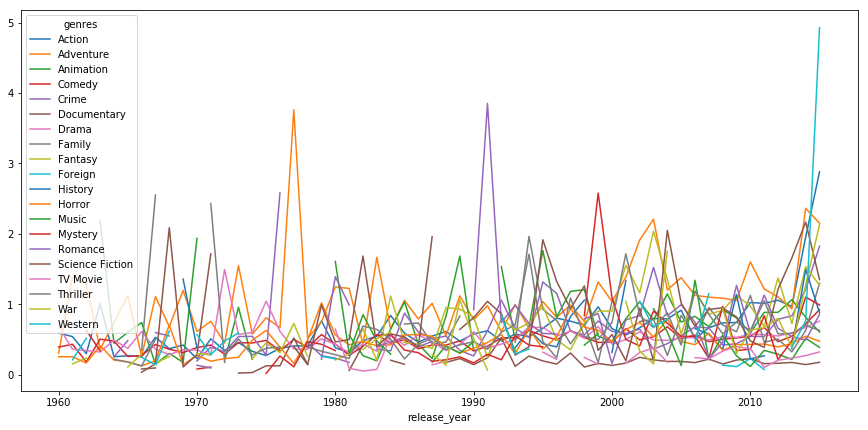

In [19]:
fig, ax = plt.subplots(figsize=(15,7))
dfm.groupby(['release_year','genres'])['popularity'].mean().unstack().plot(ax=ax)



In [20]:
# for each year which genre had the highest average popularity
dfm.groupby(['release_year','genres'], as_index=False)['popularity'].mean().groupby(['release_year'], as_index=False).max()

,release_year,genres,popularity
0,1960,Thriller,0.687575
1,1961,Western,1.394596
2,1962,Western,1.283631
3,1963,Romance,2.180410
4,1964,Western,0.736431
5,1965,War,1.121328
6,1966,Western,0.740509
7,1967,Western,2.550704
8,1968,Western,2.088194
9,1969,Thriller,1.357317


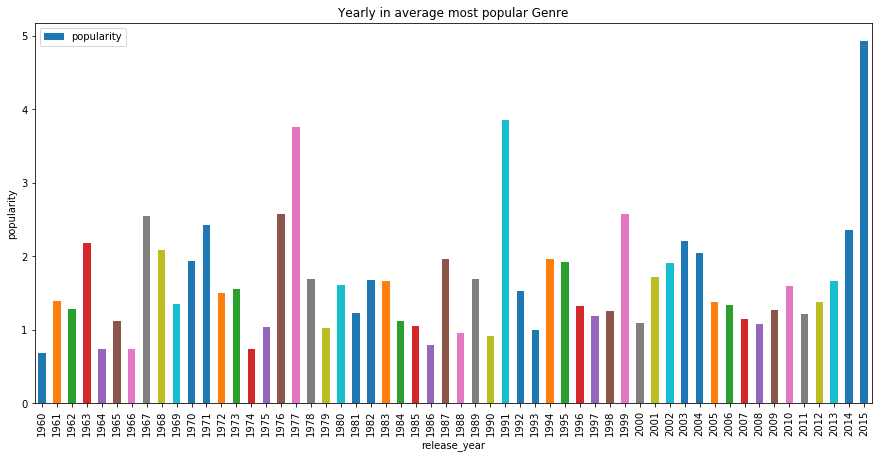

In [21]:
group=dfm.groupby(['release_year','genres'], as_index=False)['popularity'].mean().groupby(['release_year'],as_index=False).max()
fig, ax = plt.subplots(figsize=(15,7))
ax.set_ylabel('popularity')
ax.set_title("Yearly in average most popular Genre")
group.plot.bar(x='release_year',y='popularity',ax=ax)

### Research Question 2  (Replace this header name!)

In [22]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [23]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0